# Capstone Project: Predicting Post-COVID-19 Housing Market Trends

## Description of the Data
The dataset used in this analysis is `USA_Housing.csv`, which contains various features related to housing such as average area number of rooms, area population, price, etc. This data will help us understand how different factors are influencing the housing market trends post-COVID-19.

## Importing Libraries
Essential libraries for data manipulation, visualization, and machine learning.


In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA

## Loading and Checking the Dataset
Data is loaded from 'Updated_Enhanced_USA_Housing_with_Dates.csv' and checked for initial rows.


In [107]:
data = pd.read_csv('/content/drive/MyDrive/Capstone Project Details/Updated_Enhanced_USA_Housing_with_Dates.csv')
data.drop('Unnamed: 0', axis=1, inplace=True)
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,State,City,ZIP Code,Property Type,Square Footage,Lot Size,Year Built,Garage Space,Unemployment Rate,Median Household Income,Average School Score,Date
0,63437.47025,5.938082,5.769596,4.144390,32488.12680,8.988232e+05,"330 Alexander Square\nNorth Allison, NV 01942-...",NE,CityA,76878.08802,Multi-Family,1416.231279,0.961088,2088.880411,2.828894,10.208766,79179.78817,1.869601,2017-03-01
1,70305.58691,6.010513,9.227369,6.035258,42315.18059,1.590769e+06,"915 Brian Brook\nStephanieton, FL 61769-6794",FL,CityC,62363.00880,Rental,3232.864129,0.590708,1953.264735,1.015770,8.259303,122609.04570,7.815740,2017-04-01
2,48480.10904,6.381089,6.806402,3.651717,51203.60613,1.215075e+06,"3818 Stevenson Springs Suite 756\nClarkburgh, ...",WI,CityE,16758.08194,Residential,3018.374302,0.681231,1952.957400,0.001178,2.461437,35063.60403,8.153820,2017-05-01
3,64064.92520,7.206126,8.687638,5.762195,39196.33739,1.145586e+06,"27645 Kline River\nPort Samuelside, GU 06730",TX,CityB,61680.52242,Residential,3850.451899,0.924329,1892.393385,1.937762,3.889346,83661.18096,4.943505,2017-06-01
4,NaN,4.626105,6.206283,2.132105,44608.70905,1.676542e+06,USCGC Bowman\nFPO AP 06884-6883,FL,CityA,78284.09706,Residential,1484.333967,0.513721,1841.615052,0.889132,5.180156,35838.63859,8.125375,2017-07-01


## Visualizing Avg. Area Income Distribution
Histogram plot of 'Avg. Area Income' using matplotlib.

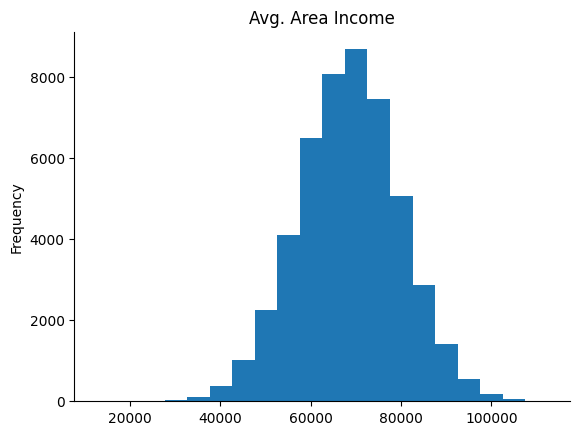

In [108]:
# @title Avg. Area Income

from matplotlib import pyplot as plt
data['Avg. Area Income'].plot(kind='hist', bins=20, title='Avg. Area Income')
plt.gca().spines[['top', 'right',]].set_visible(False)

## Exploratory Data Analysis
Descriptive statistics of dataset to understand the distributions.




In [109]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,ZIP Code,Square Footage,Lot Size,Year Built,Garage Space,Unemployment Rate,Median Household Income,Average School Score
count,48755.000000,49999.000000,48752.000000,49997.000000,49998.000000,4.999900e+04,49994.000000,49996.000000,49996.000000,49998.000000,49997.000000,49998.000000,48767.000000,49998.000000
mean,68542.159064,5.976433,6.989030,3.980521,36163.717077,1.047315e+06,54699.416007,2998.960983,0.559697,1969.673265,1.505772,6.034952,89656.419931,5.036588
std,11198.693095,1.035257,1.065484,1.250241,10095.679722,3.064186e+05,26511.445968,1164.674563,0.260929,102.863581,1.115518,2.314628,35047.251795,2.596215
min,12647.244070,1.957462,3.012394,1.418740,-2102.292383,-6.251355e+04,1741.548132,520.292086,0.011671,1528.133184,-0.271462,1.082942,17556.277270,-0.117192
25%,61070.549705,5.280143,6.269189,3.101691,29291.080213,8.406070e+05,31547.042742,1985.980821,0.338936,1900.044061,0.822752,4.083507,59116.226520,2.865645
50%,68645.419320,5.971748,7.003737,3.941450,36138.355195,1.045751e+06,54902.793730,2980.506994,0.567218,1968.968494,1.849729,6.060535,89948.952620,5.054524
75%,75996.277595,6.673445,7.713491,4.699524,42934.225130,1.254703e+06,77491.989730,4017.594765,0.781240,2038.721614,2.172260,8.010153,119686.017750,7.206121
max,112492.422500,9.729908,11.457487,7.050275,74364.950610,2.199462e+06,106913.377900,5484.261570,1.097106,2378.517775,3.279480,10.838296,164154.837400,9.927534


## Data Visualization
Initial pairplot is commented out for brevity.


In [110]:
# sns.pairplot(data)

Avg. Area Income                1245
Avg. Area House Age                1
Avg. Area Number of Rooms       1248
Avg. Area Number of Bedrooms       3
Area Population                    2
Price                              1
Address                            2
State                              4
City                               3
ZIP Code                           6
Property Type                      2
Square Footage                     4
Lot Size                           4
Year Built                         2
Garage Space                       3
Unemployment Rate                  2
Median Household Income         1233
Average School Score               2
Date                               0
dtype: int64


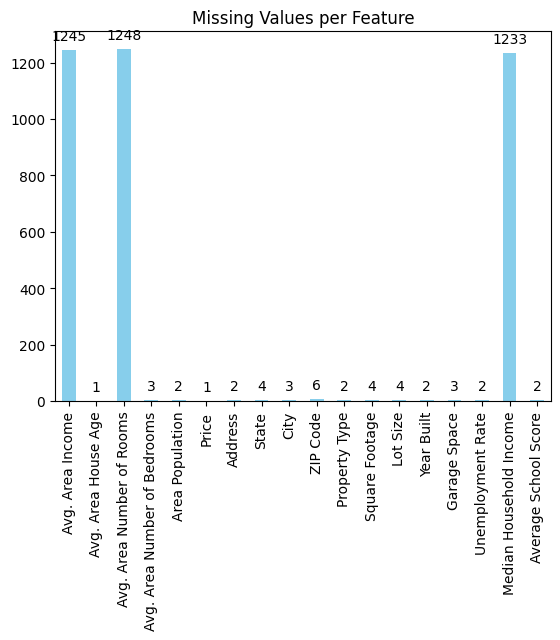

In [111]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate missing values
missing_values = data.isnull().sum()
print(missing_values)

# Plot missing values for columns with any missing data
missing_data = missing_values[missing_values > 0]
ax = missing_data.plot(kind='bar', color='skyblue')
plt.title('Missing Values per Feature')

# Annotate each bar with the count of missing values
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

## Handling Missing Values
Missing values per feature are calculated and visualized in a bar chart.
Dropping rows with NaN values and printing data count before and after.



In [112]:
print(f'Data count before droping NaN - {len(data)}')
data.dropna(inplace=True)
print(f'Data count after droping NaN - {len(data)}')

Data count before droping NaN - 50000
Data count after droping NaN - 46335


## Data Visualization Continued
Histograms for 'Avg. Area Income' and 'Price' with KDE.


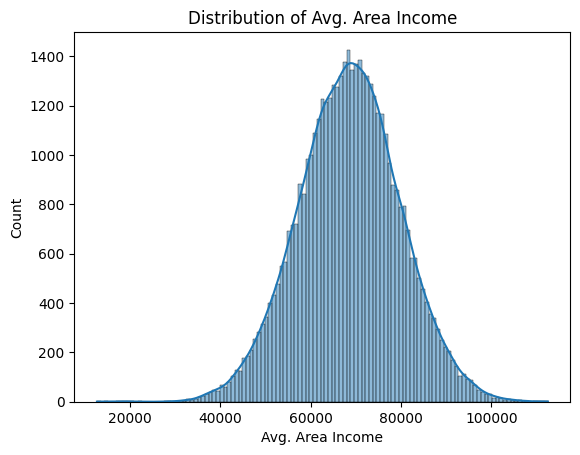

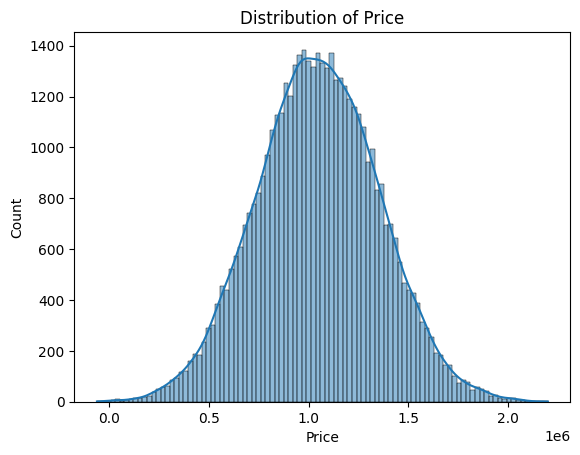

In [113]:
import seaborn as sns

# Plot distribution for 'Avg. Area Income'
sns.histplot(data['Avg. Area Income'], kde=True)
plt.title('Distribution of Avg. Area Income')
plt.show()

# Plot distribution for 'Price'
sns.histplot(data['Price'], kde=True)
plt.title('Distribution of Price')
plt.show()


## Correlation Analysis
Correlation heatmap for numeric features in the dataset.

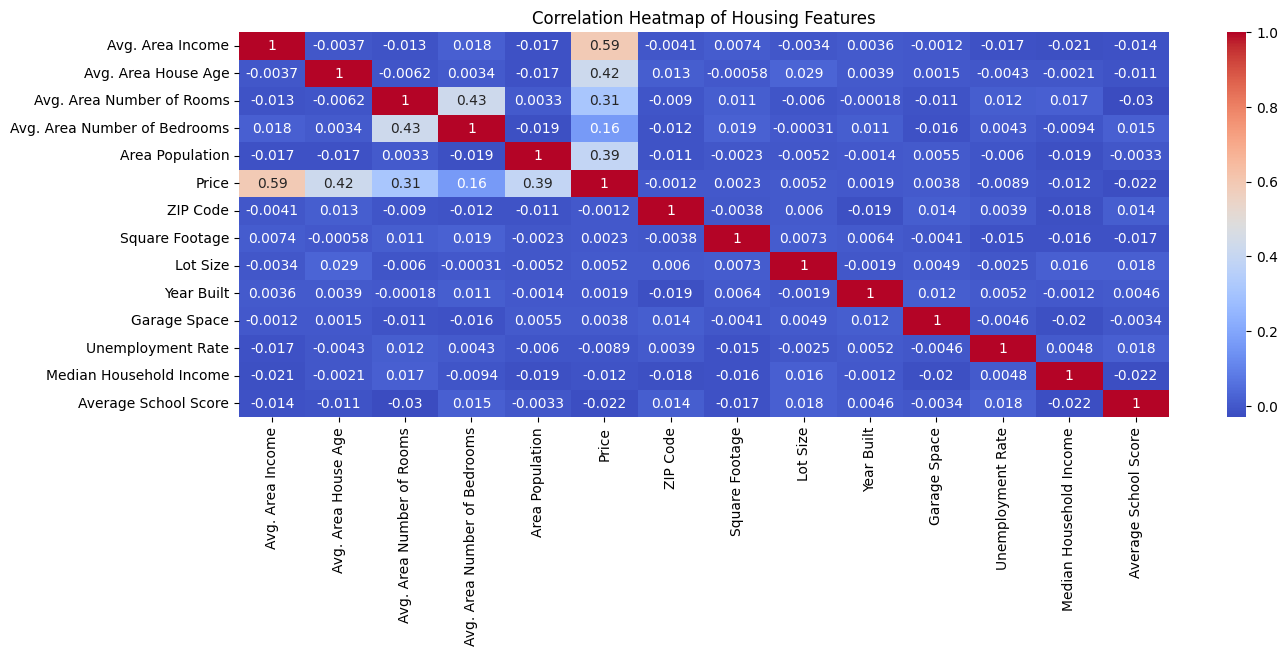

In [114]:
# Compute correlation matrix for numeric columns only
numeric_data = data.select_dtypes(include=[np.number])  # Select only numeric columns
corr = numeric_data.corr()

#specify size of heatmap
fig, ax = plt.subplots(figsize=(15, 5))

# Generate a heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Housing Features')
plt.show()


## Boxplot Visualization
Boxplot for 'Avg. Area Number of Bedrooms'.

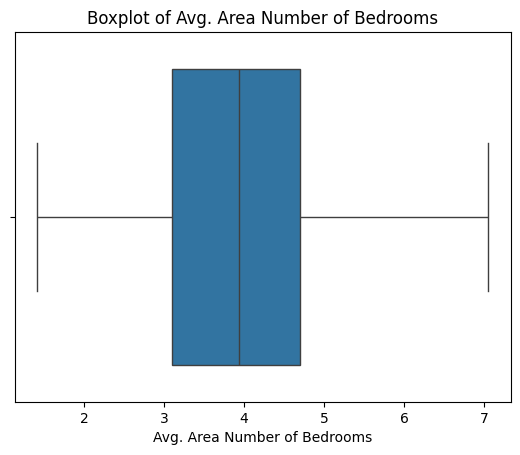

In [115]:
# Boxplot for 'Avg. Area Number of Bedrooms'
sns.boxplot(x=data['Avg. Area Number of Bedrooms'])
plt.title('Boxplot of Avg. Area Number of Bedrooms')
plt.show()


## Scatter Plot Analysis
Scatter plot of 'Price' vs 'Avg. Area Income'.

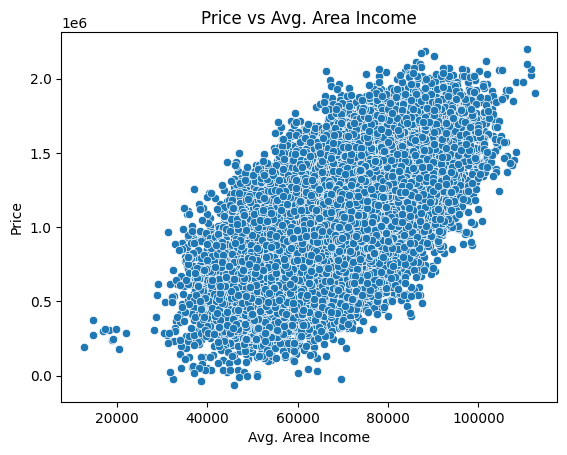

In [116]:
# Scatter plot for 'Price' vs 'Avg. Area Income'
sns.scatterplot(x='Avg. Area Income', y='Price', data=data)
plt.title('Price vs Avg. Area Income')
plt.show()


# Pairplot of Selected Features
Pairplot for a subset of housing features.

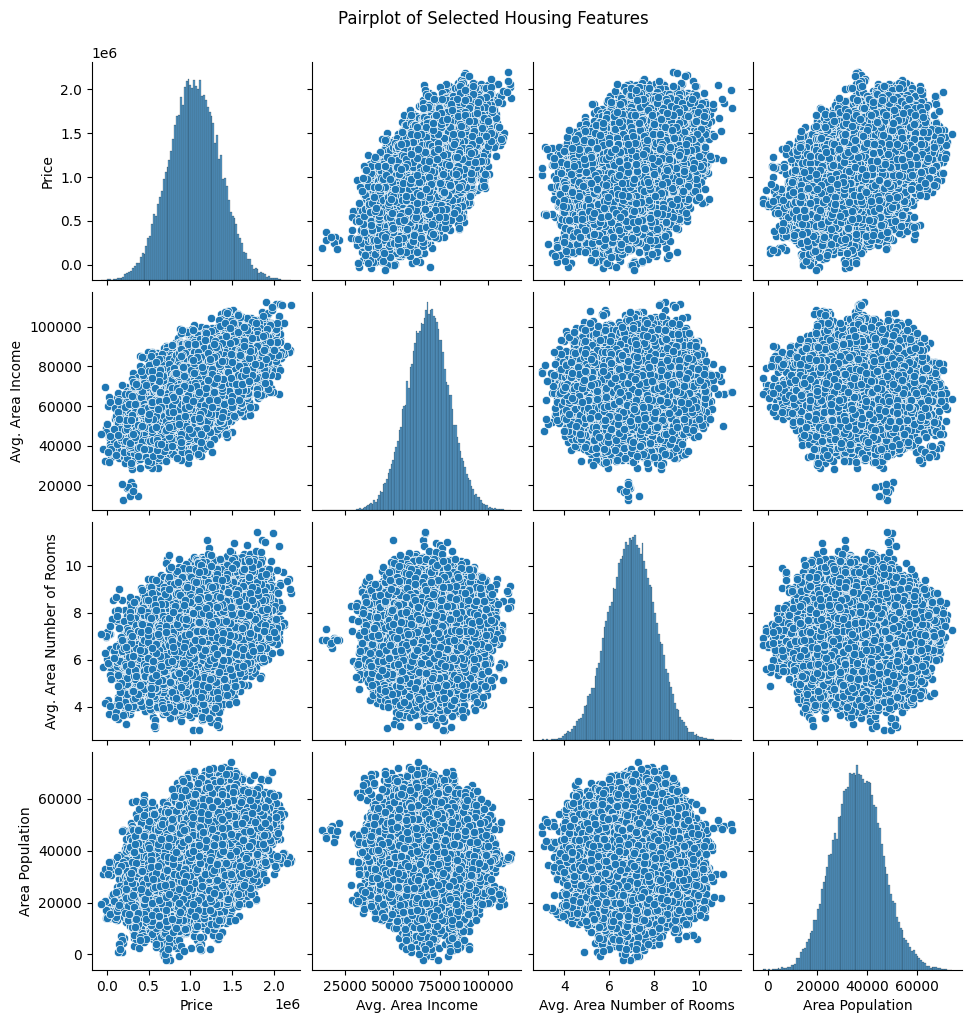

In [117]:
# Select a subset of columns for the pairplot
subset_data = data[['Price', 'Avg. Area Income', 'Avg. Area Number of Rooms', 'Area Population']]

# Generate a pairplot
sns.pairplot(subset_data)
plt.suptitle('Pairplot of Selected Housing Features', y=1.02)  # Adjust y for title spacing
plt.show()


## Time Series Analysis
Line chart for housing price trend over time.

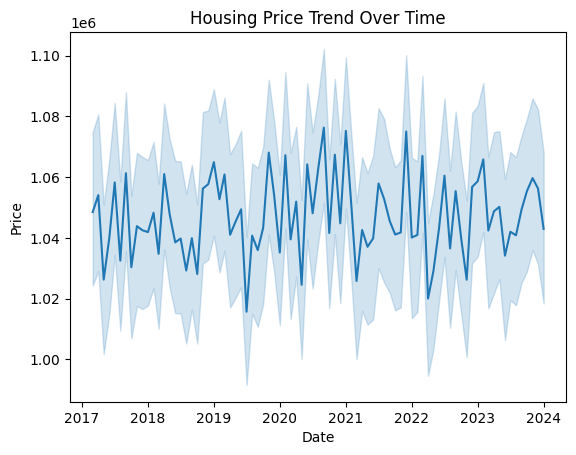

In [118]:
forcast_data = data.copy()

data['Date'] = pd.to_datetime(data['Date'])  # Convert date column to datetime
data.sort_values('Date', inplace=True)  # Sort the data by date

sns.lineplot(x='Date', y='Price', data=data)
plt.title('Housing Price Trend Over Time')
plt.show()


## Forecasting Future Prices
ARIMA model to forecast housing prices from 2024 to 2028.

In [119]:
# forcast_data['Date'] = pd.to_datetime(forcast_data['Date'])
# forcast_data.set_index('Date', inplace=True)
# forcast_data.sort_index(inplace=True)

# # Check the last date in your data
# print("Last date in data:", forcast_data.index[-1])

# # Fit the ARIMA model as before
# model = ARIMA(forcast_data['Price'], order=(1,1,0))
# model_fit = model.fit()

# # Calculate the number of months to forecast from the start of 2024 to the end of 2028
# last_date = pd.to_datetime('2024-01-01')

# forcast_years = 5

# forecast = model_fit.get_forecast(steps=forcast_years)
# forecast_index = pd.date_range(start=last_date, periods=forcast_years + 1, freq='Y')[1:]
# forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)

# # Plot the observed and forecasted values
# sns.lineplot(data=forcast_data['Price'], label='Observed')
# sns.lineplot(data=forecast_series, color='red', label='Forecast')
# plt.title('Housing Price Forecast to 2028')
# plt.ylabel('Price')
# plt.xlabel('Date')
# plt.legend()
# plt.show()

## House Age vs Price Comparison with Heat Map
Correlation heatmap including 'House Age'.


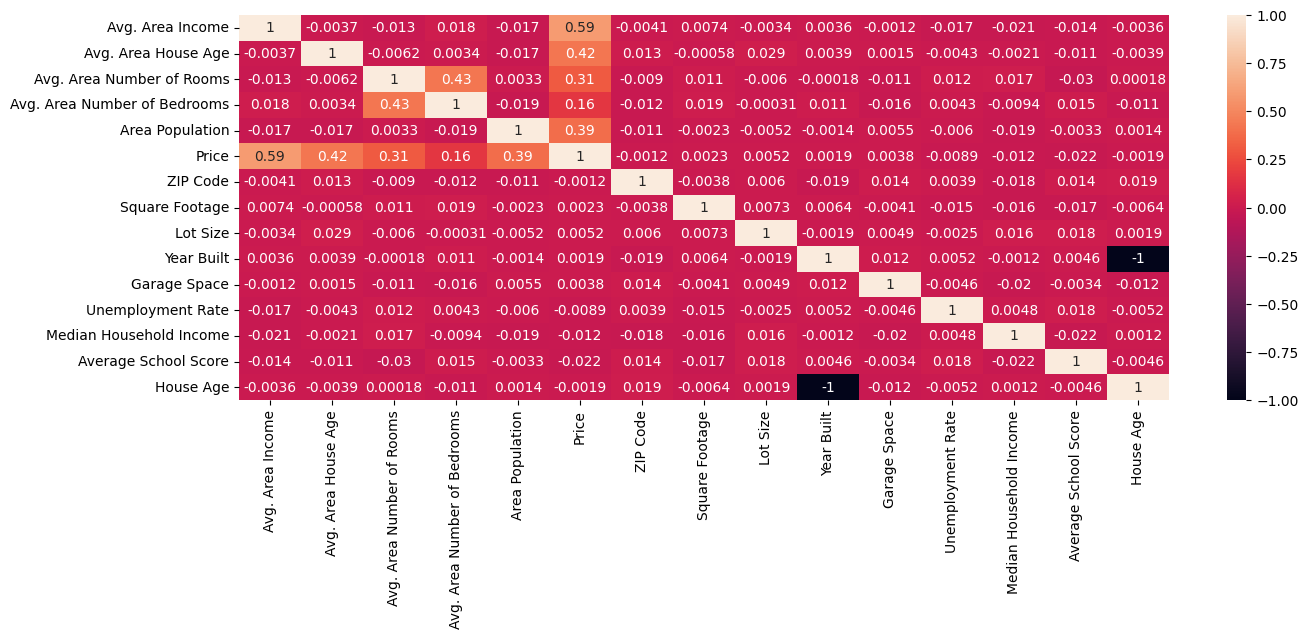

In [120]:
data['House Age'] = 2023 - data['Year Built']
numeric_data = data.select_dtypes(include=[np.number])  # Select only numeric columns

correlation_matrix = numeric_data.corr()

#specify size of heatmap
fig, ax = plt.subplots(figsize=(15, 5))

sns.heatmap(correlation_matrix, annot=True)
plt.show()

## Feature Engineering with OneHotEncoder
OneHotEncoding non-numeric columns and combining with numeric features.


In [121]:
from sklearn.preprocessing import OneHotEncoder

# Let's assume 'State' is a non-numeric column you want to include
encoder = OneHotEncoder()
X = data.drop(['Price','Address',], axis=1)
state_encoded = encoder.fit_transform(X[['State']])
state_encoded = encoder.fit_transform(X[['City']])
state_encoded = encoder.fit_transform(X[['Property Type']])
state_encoded = encoder.fit_transform(X[['Date']])

# Now, combine this with your numeric data (excluding 'State' from X if it was there)
X_numeric = data.select_dtypes(include=[np.number])
X_combined = np.hstack((X_numeric.values, state_encoded.toarray()))

## Target Variable Selection
Selecting 'Price' as the target variable for prediction.

In [122]:
# X = data.drop(['Price','Address', 'City', 'Property Type', 'Date'], axis=1)
y = data['Price']

## Scaling the Input Features
StandardScaler applied to input features for normalization.

In [123]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_combined)

## Model Implementation
Training and predicting with Linear Regression, Gradient Boosting, and Random Forest.


In [124]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_r2 = r2_score(y_test, linear_predictions)

# Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)

# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

## Model Performance Comparison
Comparison of Mean Squared Error and R-squared across models.


In [125]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Gradient Boosting', 'Random Forest'],
    'MSE': [linear_mse, gb_mse, rf_mse],
    'R-squared': [linear_r2, gb_r2, rf_r2]
})
print(results)

               Model           MSE  R-squared
0  Linear Regression  1.859209e-19   1.000000
1  Gradient Boosting  9.328024e+06   0.999900
2      Random Forest  7.866375e+04   0.999999


## Additional Models for Educational Purposes
Applying and comparing SVM and KNN models.

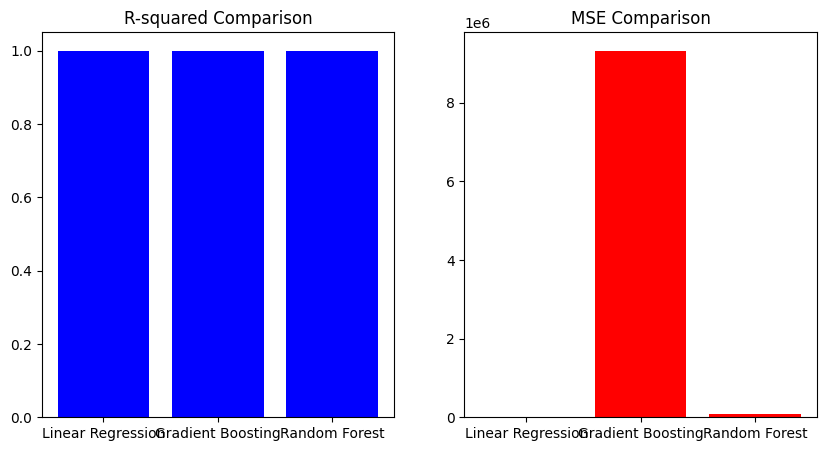

In [126]:
# Plotting for visual comparison
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(results['Model'], results['R-squared'], color='b')
plt.title('R-squared Comparison')
plt.subplot(1, 2, 2)
plt.bar(results['Model'], results['MSE'], color='r')
plt.title('MSE Comparison')
plt.show()

# Final Model Comparison
 Combined results from all models and visual comparison of performance metrics.


##Applying Additional Models for Comparison
###Support Vector Machines (SVM)
*   **Objective**: To find the hyperplane that best divides a dataset into classes (for classification) or fits the data (for regression).

*   **Why Not Chosen for Main Analysis**: SVMs can be highly effective but are generally more suited to classification tasks. In regression, they can be computationally intensive, especially for large datasets, and might not perform as well with a high number of features or data points due to increased training time and complexity.



In [127]:
# Initialize and train the model
svm_model = SVR(kernel='linear')
svm_model.fit(X_train, y_train)

# Predict and evaluate
svm_predictions = svm_model.predict(X_test)
svm_mse = mean_squared_error(y_test, svm_predictions)
svm_r2 = r2_score(y_test, svm_predictions)

print("SVM MSE:", svm_mse)
print("SVM R-squared:", svm_r2)

SVM MSE: 64122154150.64167
SVM R-squared: 0.3129675181835876


##K-Nearest Neighbors (KNN)
*   **Objective:** To predict the output based on the 'K' nearest instances in the feature space.
*   **Why Not Chosen for Main Analysis:** KNN is very simple and effective for smaller datasets. However, it becomes impractical as the size of the dataset grows. It requires storing the entire dataset in memory, and the prediction time can be slow, which is a significant drawback for large datasets.



In [128]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize and train the model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predict and evaluate
knn_predictions = knn_model.predict(X_test)
knn_mse = mean_squared_error(y_test, knn_predictions)
knn_r2 = r2_score(y_test, knn_predictions)

print("KNN MSE:", knn_mse)
print("KNN R-squared:", knn_r2)


KNN MSE: 22556955999.90171
KNN R-squared: 0.7583150212572669


##Comparison of All Models


               Model           MSE  R-squared
0  Linear Regression  1.859209e-19   1.000000
1  Gradient Boosting  9.328024e+06   0.999900
2      Random Forest  7.866375e+04   0.999999
3                SVM  6.412215e+10   0.312968
4                KNN  2.255696e+10   0.758315


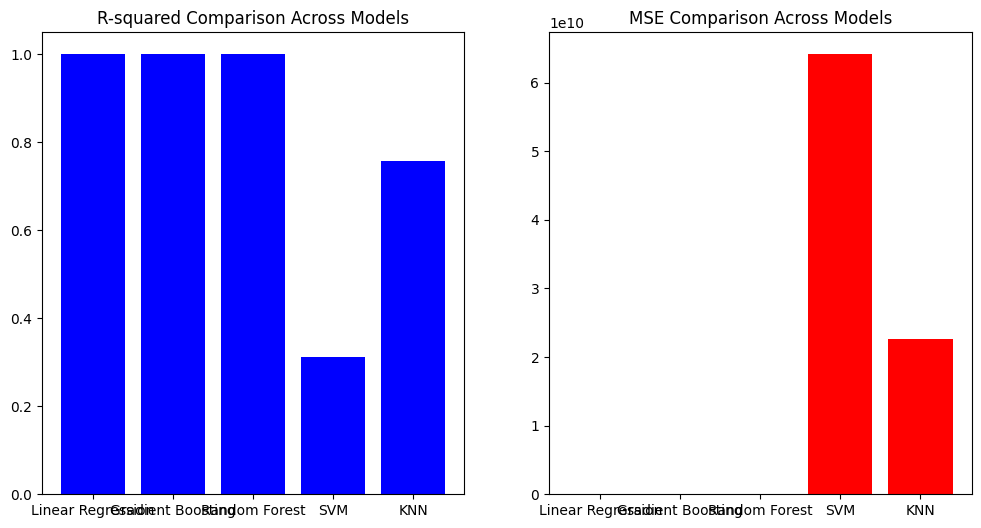

In [129]:
# Adding additional model results to the DataFrame
additional_results = pd.DataFrame({
    'Model': ['SVM', 'KNN'],
    'MSE': [svm_mse, knn_mse],
    'R-squared': [svm_r2, knn_r2]
})

# Combining results and displaying
all_results = pd.concat([results, additional_results], ignore_index=True)
print(all_results)

# Plotting for visual comparison of all models
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(all_results['Model'], all_results['R-squared'], color='b')
plt.title('R-squared Comparison Across Models')
plt.subplot(1, 2, 2)
plt.bar(all_results['Model'], all_results['MSE'], color='r')
plt.title('MSE Comparison Across Models')
plt.show()


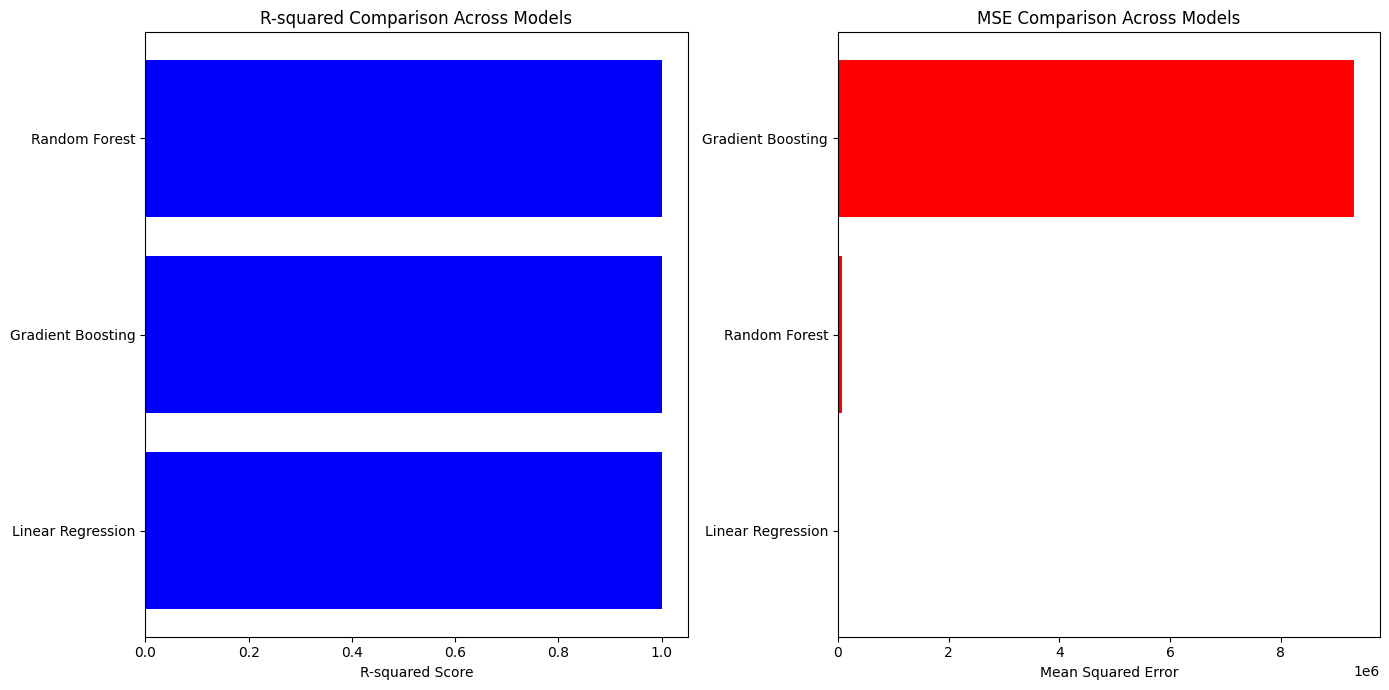

In [130]:
# Create a horizontal bar plot for R-squared values
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.barh(results['Model'], results['R-squared'], color='blue')
plt.xlabel('R-squared Score')
plt.title('R-squared Comparison Across Models')

# Sort by MSE in ascending order for logical high-to-low left-to-right visual comparison
all_results = results.sort_values(by='MSE')

# Create a horizontal bar plot for MSE values
plt.subplot(1, 2, 2)
plt.barh(all_results['Model'], all_results['MSE'], color='red')
plt.xlabel('Mean Squared Error')
plt.title('MSE Comparison Across Models')

plt.tight_layout()
plt.show()

## Persisting the Random Forest Model
Saving the trained Random Forest model using joblib.

In [131]:
import numpy as np
from sklearn.linear_model import LinearRegression
import joblib  # For loading/saving models

# Load your model
joblib.dump(rf_model, '/content/drive/MyDrive/Capstone Project Details/rf_model.pkl')


['/content/drive/MyDrive/Capstone Project Details/rf_model.pkl']

## Loading Model Features
Retrieving feature names from the saved model.

In [132]:
# Load the model
model = joblib.load('/content/drive/MyDrive/Capstone Project Details/rf_model.pkl')

# If the model is a scikit-learn pipeline where the final estimator is a model,
# and the training data included feature names:

if hasattr(model, 'feature_names_in_'):
    print(model.feature_names_in_)

# If the pipeline steps include transformers and a final estimator:
elif hasattr(model, 'named_steps') and 'final_estimator' in model.named_steps:
    estimator = model.named_steps['final_estimator']
    if hasattr(estimator, 'feature_names_in_'):
        print(estimator.feature_names_in_)
else:
  # Load the dataset
  data = pd.read_csv('/content/drive/MyDrive/Capstone Project Details/Updated_Enhanced_USA_Housing_with_Dates.csv')

  # Assuming the last column is the target variable
  features = data.columns[:-1]  # Adjust slicing as necessary
  print(features)

Index(['Unnamed: 0', 'Avg. Area Income', 'Avg. Area House Age',
       'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms',
       'Area Population', 'Price', 'Address', 'State', 'City', 'ZIP Code',
       'Property Type', 'Square Footage', 'Lot Size', 'Year Built',
       'Garage Space', 'Unemployment Rate', 'Median Household Income',
       'Average School Score'],
      dtype='object')


# User Input Function
Example function to collect user input for prediction.

In [133]:
# If the model is not saved, ensure it's trained and replace the load with the model instance
model = joblib.load('/content/drive/MyDrive/Capstone Project Details/rf_model.pkl')  # Update path accordingly

# Function to accept user input
def get_user_input():
    # Example features (extending this to 99 features)
    features = np.zeros(4)  # Initialize all features with zeros or another default value

    # Prompt user for some key features
    year_built = float(input("Enter Year Built: "))
    bedrooms = float(input("Enter number of Bedrooms: "))
    bathrooms = float(input("Enter number of Bathrooms: "))
    salary = float(input("Enter salary: "))

    # Set these user-provided values in their respective positions
    features[0] = salary
    features[1] = bedrooms
    features[2] = bathrooms
    features[3] = year_built


    # Set other features as needed, possibly with default or imputed values
    # For example, if there are categorical features that need to be encoded or other numerical features:
    # features[2] = default_value_for_feature_3
    # features[3] = default_value_for_feature_4
    # ... until all 99 features are accounted for
    print(features.shape)
    return features.reshape(1, -1)  # Reshape for compatibility with model input


# Function to make a prediction
def make_prediction(input_data):
    prediction = model.predict(input_data)
    return prediction

# Main function to run the process
def main():
    user_input = get_user_input()  # Get user input
    prediction = make_prediction(user_input)  # Make prediction
    print(f"Predicted Output: {prediction[0]}")  # Print the predicted output

# Run the main function
if __name__ == "__main__":
    main()

KeyboardInterrupt: Interrupted by user